In [97]:
# data manupulation
import pandas as pd
# mathematical operation
import numpy as np
# data visulatzation
import matplotlib.pyplot as plt
import seaborn as sns
# remove warning
import warnings
warnings.filterwarnings('ignore')


In [98]:
#ml algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [99]:
# Lode dataset
air=pd.read_csv("Passanger_booking_data.csv")
air.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [100]:
air.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
7814,1,Internet,RoundTrip,16,22,14,Mon,DACSYD,Australia,1,0,0,8.58,0
37923,2,Internet,CircleTrip,162,5,7,Thu,DPSTPE,Taiwan,0,1,0,4.67,0
49068,1,Internet,RoundTrip,173,6,10,Fri,MELTPE,Taiwan,1,0,0,8.83,0
18796,1,Internet,RoundTrip,70,27,2,Sat,MELMRU,Australia,1,0,1,8.83,0
17541,1,Internet,RoundTrip,31,93,4,Sun,KTMMFM,Macau,1,0,1,4.75,0
30451,1,Internet,RoundTrip,2,4,10,Tue,DACKIX,Bangladesh,0,0,0,7.00,0
9942,1,Internet,RoundTrip,9,25,5,Wed,DMKPER,Australia,0,0,0,5.62,0
4541,2,Internet,RoundTrip,89,28,16,Tue,CKGSUB,China,1,0,0,4.83,0
2010,1,Internet,RoundTrip,99,21,13,Sun,AKLKUL,New Zealand,1,0,0,8.83,0
12333,7,Mobile,RoundTrip,382,17,3,Thu,HKTSYD,Australia,1,0,0,8.58,0


In [101]:
#check for shape
air.shape

(50002, 14)

In [102]:
# check for columns
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [103]:
# check for info
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [104]:
# check null values
air.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [105]:
# drop duplicating
air.drop_duplicates(inplace=True)

In [106]:
air.duplicated().sum()

0

In [107]:
# describe summary stastistics numerical columns
air.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000
mean,1.590204,84.723393,23.054197,9.070613,0.668222,0.295639,0.426638,7.279937,0.149991
std,1.016540,90.409389,33.831644,5.413007,0.470856,0.456334,0.494594,1.496381,0.357066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


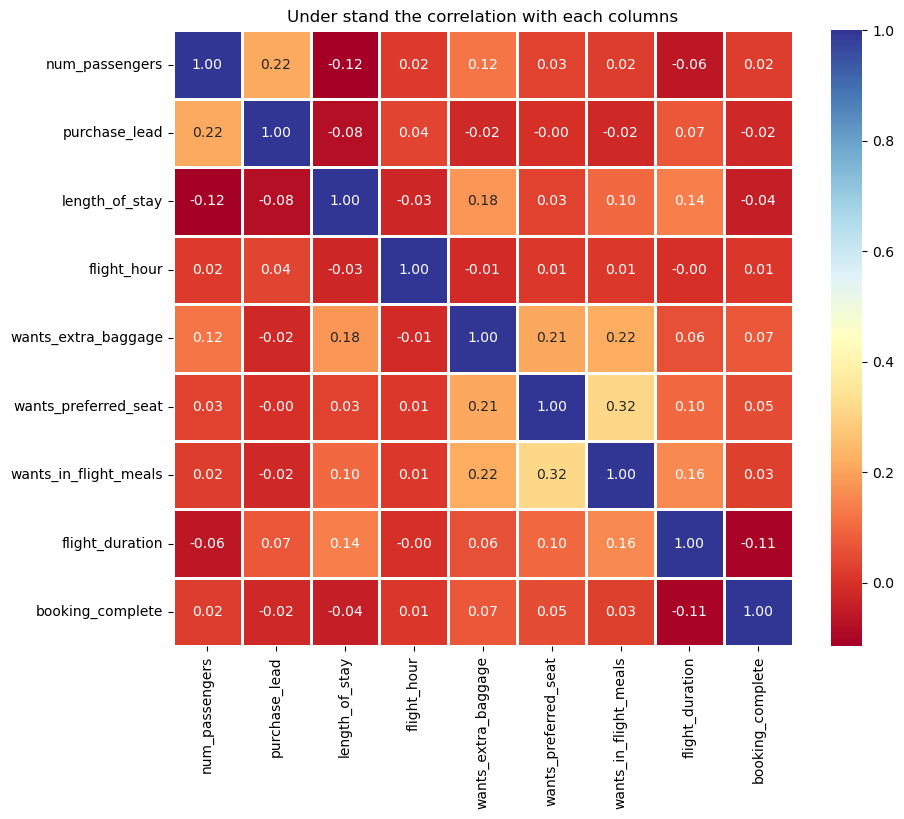

In [108]:
# visualization correlation map
plt.figure(figsize=(10,8))
sns.heatmap(air.corr(),annot=True,cmap='RdYlBu',fmt='.2f',annot_kws=None,linewidths=1)
plt.title("Under stand the correlation with each columns")
plt.show()

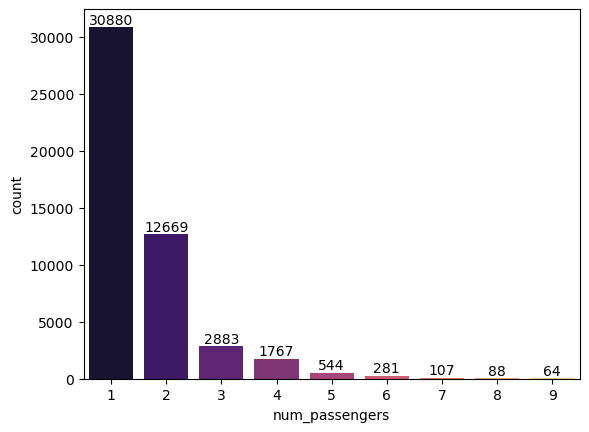

In [109]:
#number of passengers
ax=sns.countplot(x='num_passengers',data=air,palette='magma')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

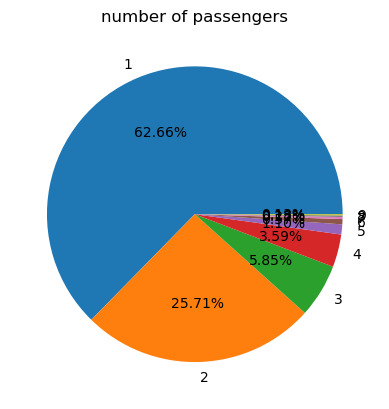

In [110]:
plt.pie(air.num_passengers.value_counts(),labels=air.num_passengers.value_counts().index,autopct='%.2f%%')
plt.title('number of passengers')
plt.show()

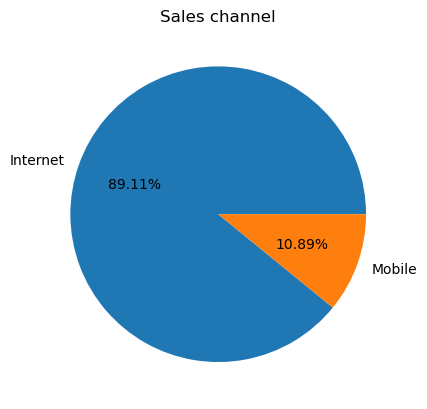

In [111]:
# sales channel
plt.pie(air.sales_channel.value_counts(),labels=air.sales_channel.value_counts().index,autopct='%.2f%%')
plt.title('Sales channel')
plt.show()

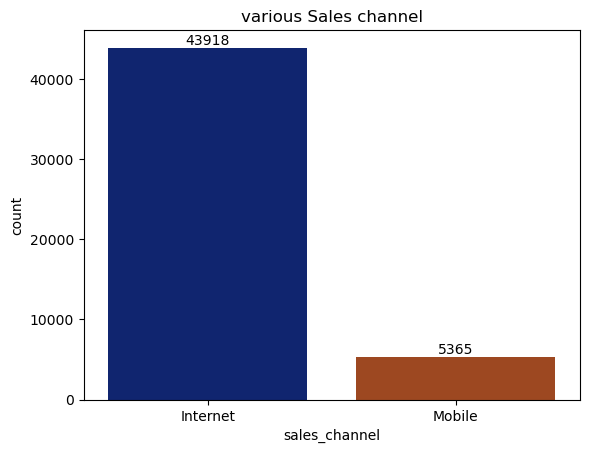

In [112]:
ax=sns.countplot(x='sales_channel',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("various Sales channel")
plt.show()

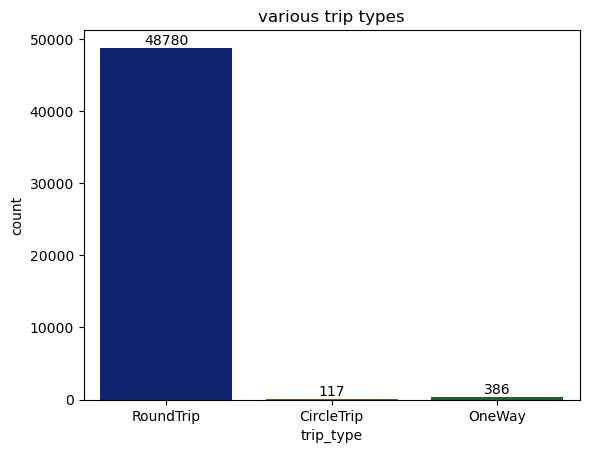

In [113]:
# trip types
ax=sns.countplot(x='trip_type',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("various trip types")
plt.show()

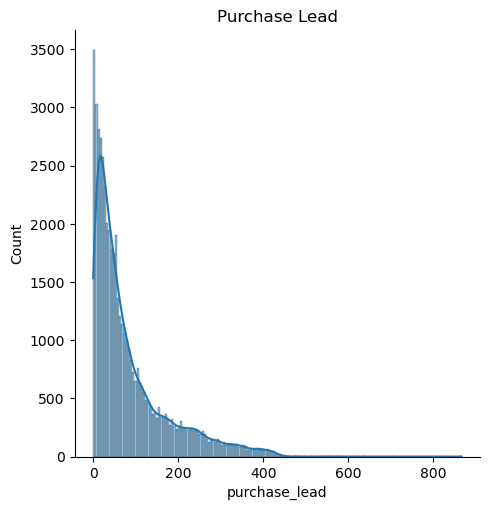

In [114]:
#purchase lead
sns.displot(air.purchase_lead,kind='hist',kde=True)
plt.title("Purchase Lead")
plt.show()

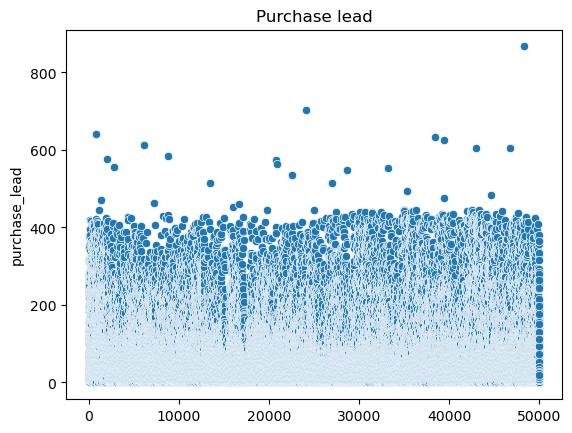

In [115]:
sns.scatterplot(air.purchase_lead)
plt.title("Purchase lead")
plt.show()

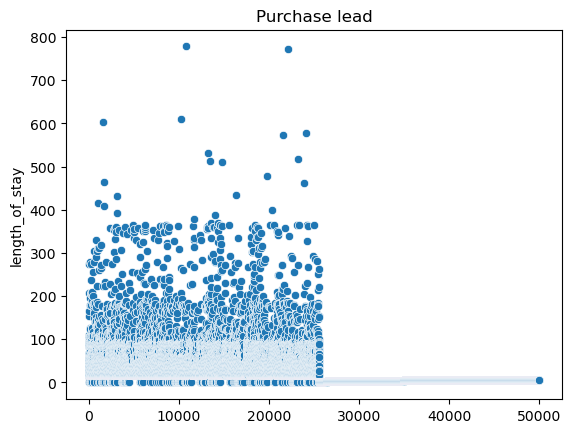

In [116]:
# lenth_of_stay
sns.scatterplot(air.length_of_stay)
plt.title("Purchase lead")
plt.show()

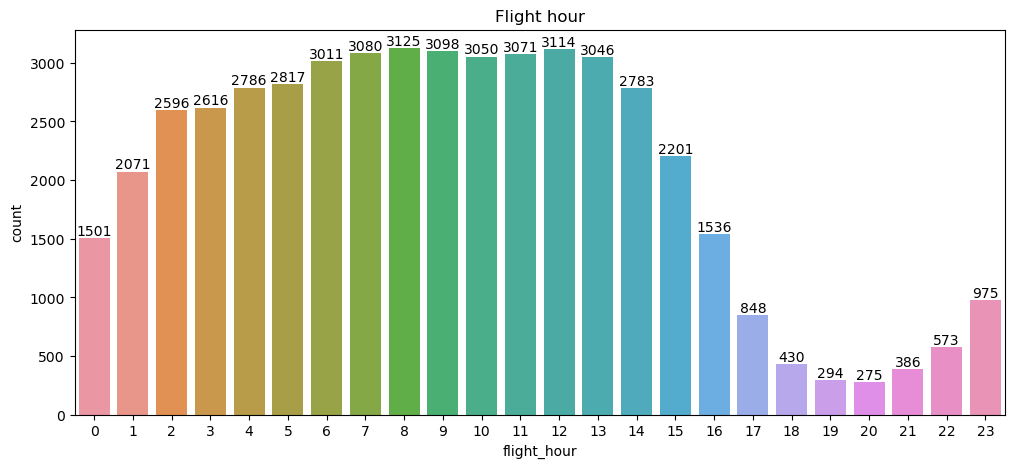

In [117]:
# flight hour
plt.figure(figsize=(12,5))
ax=sns.countplot(x='flight_hour',data=air)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Flight hour")
plt.show()

In [118]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

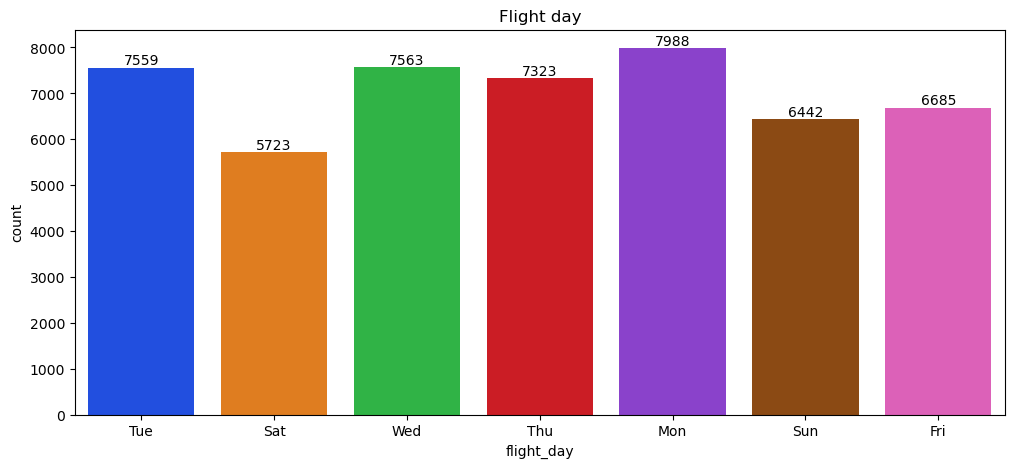

In [119]:
# flight day
plt.figure(figsize=(12,5))
ax=sns.countplot(x='flight_day',data=air,palette='bright')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Flight day")    
plt.show()

In [120]:
# route of flight
air['route'].unique()

array(['AKLHGH', 'AKLDEL', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [121]:
# booking origin (country where people want to go)
air['booking_origin'].unique()

array(['Australia', 'New Zealand', 'India', 'United Kingdom', 'China',
       'South Korea', 'Canada', 'Japan', 'Malaysia', 'Singapore',
       'Switzerland', 'Germany', 'Indonesia', 'Czech Republic', 'Vietnam',
       'Thailand', 'Spain', 'Romania', 'Ireland', 'Italy', 'Slovakia',
       'United Arab Emirates', 'Tonga', 'Réunion', '(not set)',
       'Saudi Arabia', 'Netherlands', 'Qatar', 'Hong Kong', 'Philippines',
       'Sri Lanka', 'France', 'Croatia', 'United States', 'Laos',
       'Hungary', 'Portugal', 'Cyprus', 'Cambodia', 'Poland', 'Belgium',
       'Oman', 'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya',
       'Taiwan', 'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark',
       'Colombia', 'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia',
       'Mauritius', 'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden',
       'Austria', 'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [122]:
x=air['booking_origin'].value_counts().sort_values(ascending=False).head(10)
l=x.index.to_list()

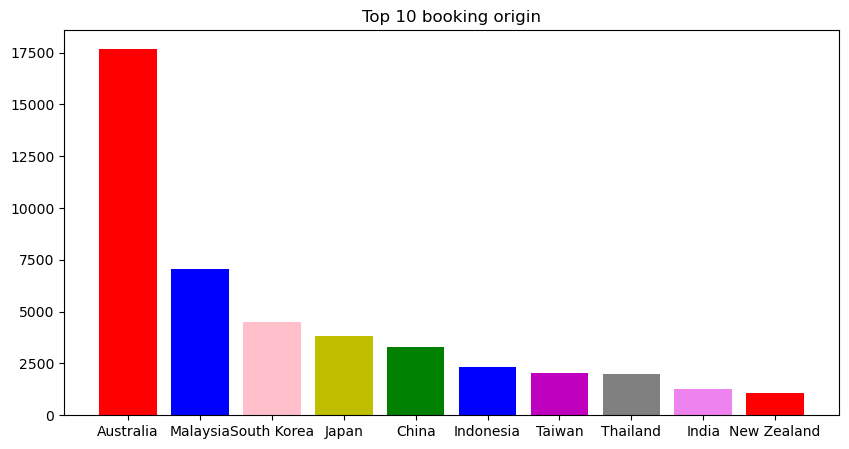

In [123]:
plt.figure(figsize=(10,5))
plt.bar(x.index,x,color=['r','b','pink','y','g','b','m','grey','violet'])
plt.title("Top 10 booking origin")
plt.show()

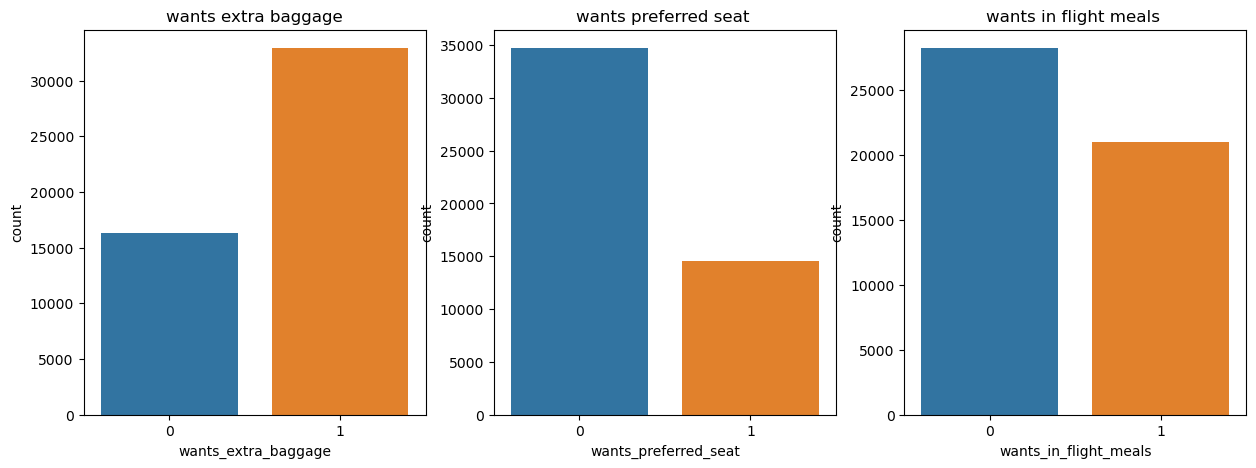

In [124]:
fig, axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.countplot(x='wants_extra_baggage',data=air,ax=axes[0])
axes[0].set_title('wants extra baggage')

sns.countplot(x='wants_preferred_seat',data=air,ax=axes[1])
axes[1].set_title('wants preferred seat ')

sns.countplot(x='wants_in_flight_meals',data=air,ax=axes[2])
axes[2].set_title('wants in flight meals ')

plt.show()

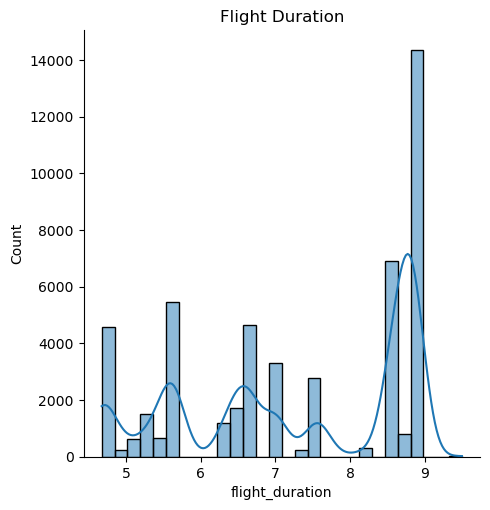

In [125]:
#flight duration
sns.displot(air['flight_duration'],kde=True)
plt.title("Flight Duration")
plt.show()

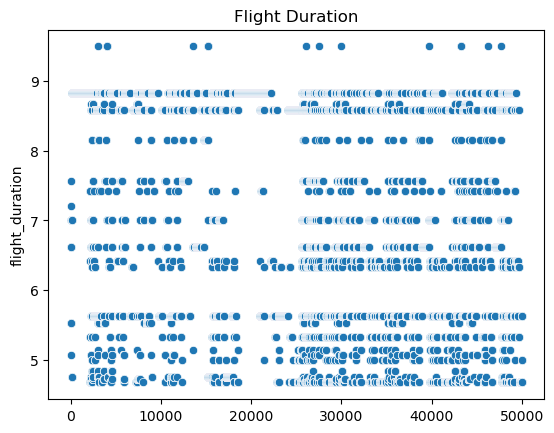

In [126]:
sns.scatterplot(air['flight_duration'])
plt.title("Flight Duration")
plt.show()

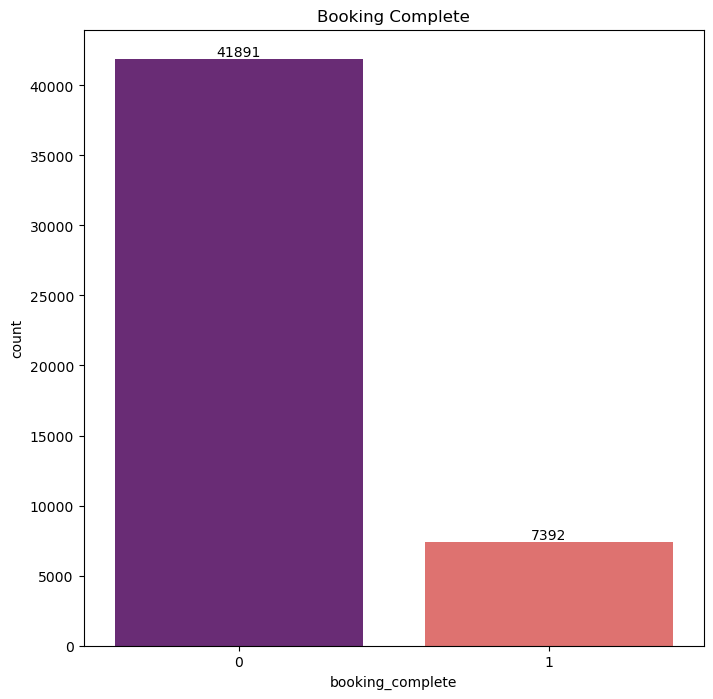

In [127]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='booking_complete',data=air,palette='magma')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Booking Complete")
plt.show()

In [128]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

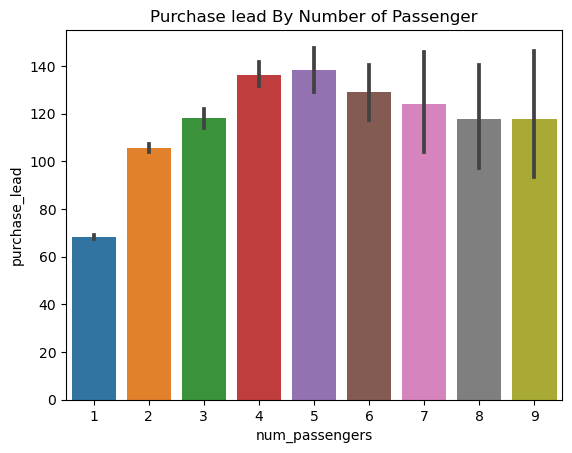

In [129]:
sns.barplot(x='num_passengers',y='purchase_lead',data=air)
plt.title('Purchase lead By Number of Passenger')
plt.show()

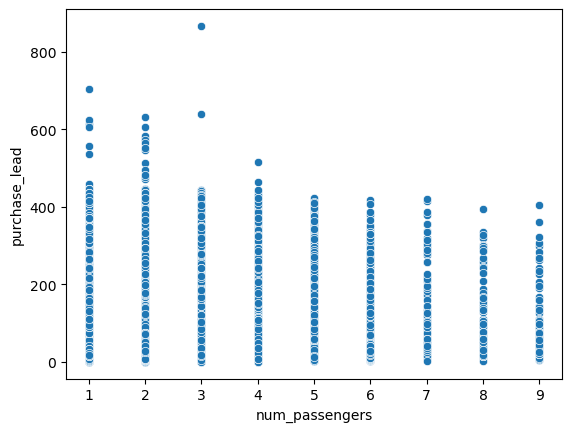

In [130]:
sns.scatterplot(x='num_passengers',y='purchase_lead',data=air)
plt.show()

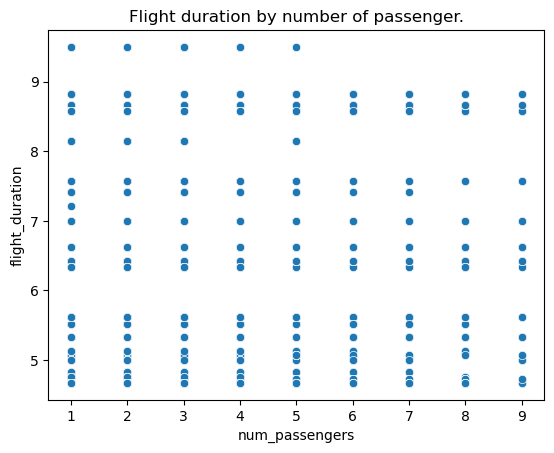

In [131]:
sns.scatterplot(x='num_passengers',y='flight_duration',data=air)
plt.title("Flight duration by number of passenger.")
plt.show()

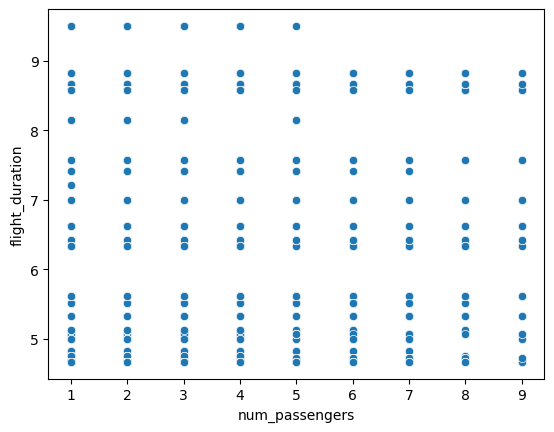

In [132]:
sns.scatterplot(x='num_passengers',y='flight_duration',data=air)
plt.show()

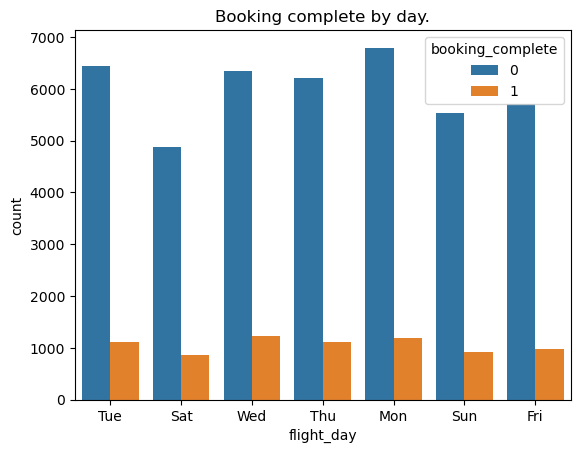

In [133]:
sns.countplot(x=air['flight_day'],hue=air['booking_complete'])
plt.title("Booking complete by day.")
plt.show()

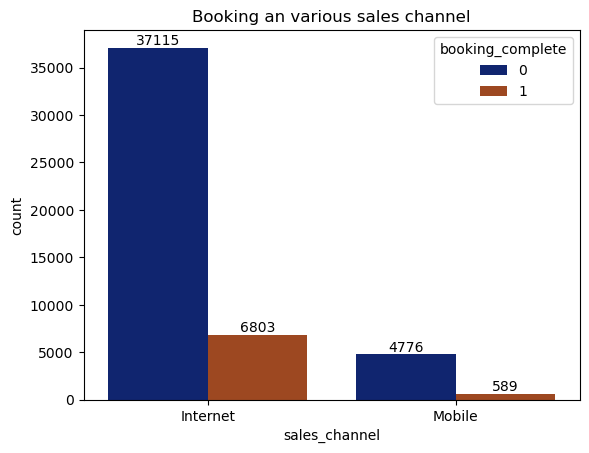

In [134]:
ax=sns.countplot(x='sales_channel',hue='booking_complete',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Booking an various sales channel")    
plt.show()

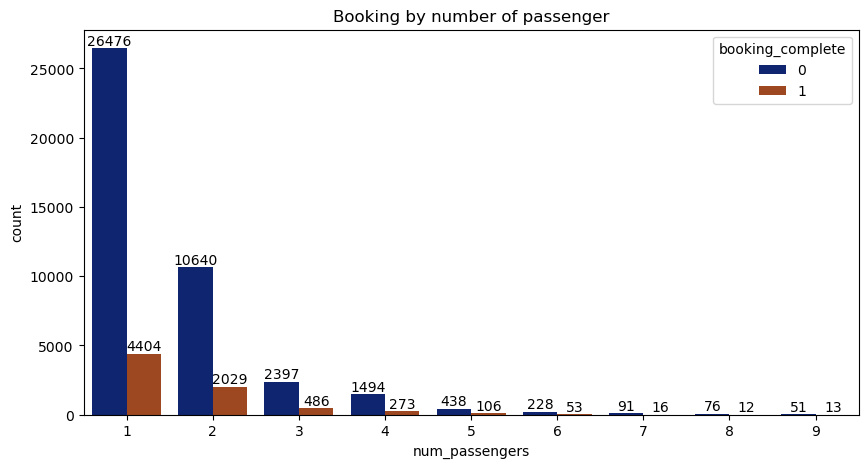

In [135]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='num_passengers',hue='booking_complete',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Booking by number of passenger")    
plt.show()

In [136]:
air

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [137]:
label_encoder=LabelEncoder()

air['sales_channel']=label_encoder.fit_transform(air['sales_channel'])
air['trip_type']=label_encoder.fit_transform(air['trip_type'])
air['flight_day']=label_encoder.fit_transform(air['flight_day'])
air['booking_origin']=label_encoder.fit_transform(air['booking_origin'])


In [138]:
air

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,21,12,6,5,AKLHGH,4,0,0,0,7.21,1
1,2,0,2,262,19,7,2,AKLDEL,61,1,0,0,5.52,0
2,1,0,2,112,20,3,2,AKLDEL,61,0,0,0,5.52,0
3,2,0,2,243,22,17,6,AKLDEL,36,1,1,0,5.52,0
4,1,0,2,96,31,4,2,AKLDEL,61,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,27,6,9,2,PERPNH,4,1,0,1,5.62,0
49998,1,0,2,111,6,4,3,PERPNH,4,0,0,0,5.62,0
49999,1,0,2,24,6,22,2,PERPNH,4,0,0,1,5.62,0
50000,1,0,2,15,6,11,1,PERPNH,4,1,0,1,5.62,0


In [139]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [140]:
x=air[['num_passengers', 'sales_channel', 'trip_type', 
       'length_of_stay', 'flight_hour', 'flight_day', 
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']]
x

,num_passengers,sales_channel,trip_type,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,2,12,6,5,4,0,0,0,7.21
1,2,0,2,19,7,2,61,1,0,0,5.52
2,1,0,2,20,3,2,61,0,0,0,5.52
3,2,0,2,22,17,6,36,1,1,0,5.52
4,1,0,2,31,4,2,61,0,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,6,9,2,4,1,0,1,5.62
49998,1,0,2,6,4,3,4,0,0,0,5.62
49999,1,0,2,6,22,2,4,0,0,1,5.62
50000,1,0,2,6,11,1,4,1,0,1,5.62


In [141]:
y=air[['booking_complete']]
y

,booking_complete
0,1
1,0
2,0
3,0
4,0
...,...
49997,0
49998,0
49999,0
50000,0


In [142]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [143]:
#decision tree classifier
dtc=DecisionTreeClassifier(random_state=1)

#train model on training data
dtc.fit(X_train,Y_train)

# make predict
dtc_pred=dtc.predict(X_test)

# model performance
dtc_accuracy=accuracy_score(dtc_pred,Y_test)*100
print(f"Accuracy:{dtc_accuracy:2f}%")

report=classification_report(dtc_pred,Y_test)

# print the classification report
print("Classification Report:")
print(report)

Accuracy:76.917458%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10297
           1       0.28      0.25      0.26      2024

    accuracy                           0.77     12321
   macro avg       0.57      0.56      0.56     12321
weighted avg       0.76      0.77      0.76     12321



In [144]:
# naive bayes
nv=GaussianNB()

# train the model on training data
nv.fit(X_train,Y_train)

# Make prediction on test data
nv_pred=nv.predict(X_test)

# model performance
nv_accuracy=accuracy_score(nv_pred,Y_test)*100
print(f"Accuracy:{nv_accuracy:2f}%")

report=classification_report(nv_pred,Y_test)

# print the classification report
print("Classification Report:")
print(report)

Accuracy:83.248113%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11729
           1       0.10      0.31      0.15       592

    accuracy                           0.83     12321
   macro avg       0.53      0.58      0.53     12321
weighted avg       0.92      0.83      0.87     12321



In [145]:
# Logistic Regression
model=LogisticRegression()

# train the model on training data
model.fit(X_train,Y_train)

# Make prediction on test data
y_pred=model.predict(X_test)

# model performance
lr_accuracy=accuracy_score(y_pred,Y_test)*100
print(f"Accuracy:{lr_accuracy:2f}%")

report=classification_report(y_pred,Y_test)

# print the classification report
print("Classification Report:")
print(report)

Accuracy:85.082380%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12321
           1       0.00      0.00      0.00         0

    accuracy                           0.85     12321
   macro avg       0.50      0.43      0.46     12321
weighted avg       1.00      0.85      0.92     12321



In [146]:
# K-nearest neighbors knn classifier
k_neighbors=5

knn_model=KNeighborsClassifier(n_neighbors=k_neighbors)

knn_model.fit(X_train,Y_train)

# Make prediction on test data
y_pred=knn_model.predict(X_test)

# model performance
knn_accuracy=knn_model.score(X_test,Y_test)*100
print(f"Accuracy:{knn_accuracy:2f}%")

report=classification_report(y_pred,Y_test)

# print the classification report
print("Classification Report:")
print(report)

Accuracy:82.931580%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     11552
           1       0.14      0.33      0.19       769

    accuracy                           0.83     12321
   macro avg       0.54      0.60      0.55     12321
weighted avg       0.90      0.83      0.86     12321



In [147]:
# random forest classifier

rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train,Y_train)

# Make prediction on test data
y_pred=rf_model.predict(X_test)

# model performance
rf_accuracy=rf_model.score(X_test,Y_test)*100
print(f"Random forest Accuracy:{rf_accuracy:2f}%")

report=classification_report(y_pred,Y_test)

# print the classification report
print("Classification Report:")
print(report)

Random forest Accuracy:83.491600%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11699
           1       0.12      0.34      0.17       622

    accuracy                           0.83     12321
   macro avg       0.54      0.60      0.54     12321
weighted avg       0.92      0.83      0.87     12321



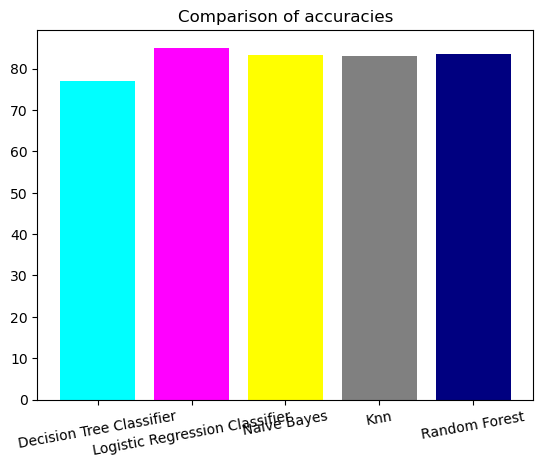

In [158]:

# List of accuracies for different classifiers
l = [dtc_accuracy, lr_accuracy,nv_accuracy, knn_accuracy, rf_accuracy]

# List of classifier names
m = ['Decision Tree Classifier', 'Logistic Regression Classifier', 'Naive Bayes', 'Knn', 'Random Forest']

# Bar chart with custom colors for each classifier
plt.bar(m, l, color=['#00FFFF', '#FF00FF', '#FFFF00', '#808080', '#000080'])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=10)

# Add a title to the plot
plt.title("Comparison of accuracies")

# Display the plot
plt.show()
